In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [14]:
# Load dataset
breast = pd.read_csv("breast cancer.csv")


In [15]:
# Inspect available columns
print("Dataset Columns:", breast.columns.tolist())

Dataset Columns: ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']


In [4]:
# Drop 'id' column (exists in dataset)
breast.drop(['id'], axis=1, inplace=True)

In [16]:
# Drop 'Unnamed: 32' only if it exists
if 'Unnamed: 32' in breast.columns:
    breast.drop('Unnamed: 32', axis=1, inplace=True)

In [17]:
# Encode the target variable
le = LabelEncoder()
breast['diagnosis'] = le.fit_transform(breast['diagnosis'])

In [18]:
# Split features & target variable
X = breast.drop('diagnosis', axis=1)
y = breast['diagnosis']

In [19]:
breast.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [20]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
import os
import pickle

# Ensure the 'models' directory exists
os.makedirs("models", exist_ok=True)

# Save the trained scaler
pickle.dump(scaler, open("models/scaler.pkl", "wb"))
lr=LogisticRegression()
# Save the trained model
# pickle.dump(lr, open("models/model.pkl", "wb"))
lr.fit(X_train,y_train)

print("Model and scaler saved successfully!")


Model and scaler saved successfully!


In [26]:
# Evaluate performance
y_pred_lr = lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f'Model Accuracy: {accuracy_lr:.4f}')

Model Accuracy: 0.9737


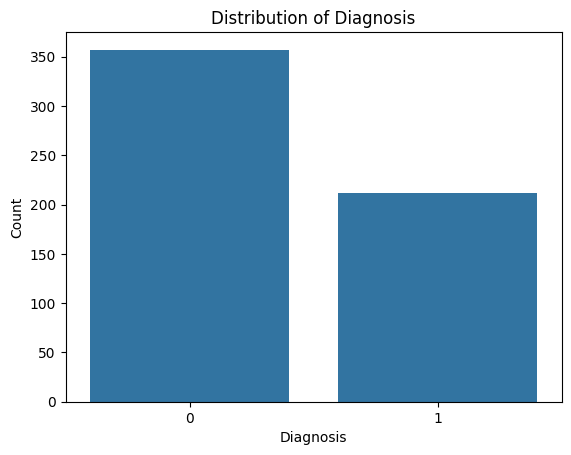

In [27]:
# Visualization: Diagnosis Distribution
sns.countplot(x=breast['diagnosis'])
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

In [44]:
# ---- Prediction on New Data ----
input_text = (-0.23717126, -0.64487029, -0.11382239, -0.57427777, -0.60294971,
        1.0897546 ,  0.91543814,  0.41448279,  0.09311633,  1.78465117,
        2.11520208,  0.28454765, -0.31910982,  0.2980991 ,  0.01968238,
       -0.47096352,  0.45757106,  0.28733283, -0.23125455,  0.26417944,
        0.66325388,  0.12170193,  0.42656325,  0.36885508,  0.02065602,
        1.39513782,  2.0973271 ,  2.01276347,  0.61938913,  2.9421769 , 3.15970842)

In [55]:
# Convert to NumPy array and reshape
# np_df = np.asarray(input_text).reshape(1, -1)
np_df=np.asarray(input_text)
npdf=np_df.reshape(1,-1)
pred=lr.predict(npdf)[0]
print(pred)
# print(np_df)

1


In [58]:
pickle.dump(lr,open('model1.pkl','wb'))

In [57]:
# Load the saved scaler and model
scaler = pickle.load(open('models/scaler.pkl', 'rb'))
model = pickle.load(open('models/model.pkl', 'rb'))

In [49]:
# Scale input before prediction
# np_df_scaled = scaler.transform(np_df)

In [50]:
# Make prediction
# pred = model.predict(np_df_scaled)

In [51]:

# Output Result
print("Prediction: Cancerous" if pred[0] == 1 else "Prediction: Not Cancerous")

Prediction: Cancerous
